In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px 
import requests
# import selenium

from bs4 import BeautifulSoup

In [2]:
url_kauno = 'https://kauno.diena.lt/'

page_kauno = requests.get(url_kauno)

source_kauno = page_kauno.content

bs_kauno = BeautifulSoup(source_kauno, 'html.parser')
# print(bs)
nuorodos_kauno = []
pavadinimai_kauno = []
straipsniai_kauno = bs_kauno.find_all('div', {'category-block-row grid-12 alpha omega unscore'})
for s in straipsniai_kauno:
    i = s.find('div', {'class':'articles-list-title-wrapper'})
    if i is not None:
        t = i.find('a', {'class':'articles-list-title'})
        pavadinimai_kauno.append(t.text)
        nuorodos_kauno.append(t['href'])
        # print(':::REM:::')
        # print(t)
        # print('HREF?')
        # print(t['href'])
        # print(t.text)

print(len(pavadinimai_kauno))
print(pavadinimai_kauno)
print(len(nuorodos_kauno))
print(nuorodos_kauno)

url = 'https://www.delfi.lt/'
page = requests.get(url)
source = page.content
bs = BeautifulSoup(source, 'html.parser')


nuorodos = []
pavadinimai = []
straipsniai = bs.find_all('div', {'class':'block-type-102-headline__title'})
# print(len(straipsniai))
for s in straipsniai:
    if s is not None:
        i = s.find('a')
        # print(':::NEXT:::')
        # print(i['href'])
        # print(i.text)
        nuorodos.append(i['href'])
        pavadinimai.append(i.text)
print(len(pavadinimai))
print(pavadinimai)
print(len(nuorodos))
print(nuorodos)

29
['2024-ųjų Seimo rinkimai: laimėjo socdemai, antri – TS-LKD, treti – „Nemuno Aušra“ ', 'Į antrąjį Seimo rinkimų turą patekę kandidatai (apžvalga)', 'Judrioje Aleksoto gatvėje – laikini eismo ribojimai', 'Septyniose apygardose bus perskaičiuoti balsai, Panemunėje gali būti trys kandidatai ', 'Kauniečiai noriai balsavo Seimo rinkimuose: kai kur – stebinantis aktyvumas', 'Veiksmas Partizanų gatvėje: pareigūnai šturmavo automobilį, sulaikytas vyras', 'Darbdavio magija: kas darbuotoją skatina įsitraukti ir augti?', 'Akibrokštas privačiai greitajai pagalbai: 50 įdarbintų žmonių valstybei neįdomu?', 'Vyriausybė nepritaria, kad baigę gyvulininkystę teiktų sveikatos paslaugas su gyvūnais', 'Šeima – tarsi universitetas, kuriame mokomės iš artimųjų', 'Ką pasirinks L. Mažylis – Seimą ar EP?', 'G. Landsbergis: Ukrainai patyrus pralaimėjimą, Šiaurės ir Baltijos šalims kiltų grėsmė', 'Iš išaugtų vaikiškų drabužių – prisiminimų šiltukai', 'Mainų platformos įkūrėja: gyventi tvariau – naudinga ir fin

In [3]:
# Suraskite vidutinį straipsnių pavadinimuose esančių žodžių skaičių.
zodziu_kiekiai_kauno = []
for pav in pavadinimai_kauno:
    kiekis =len(pav.split())
    zodziu_kiekiai_kauno.append(kiekis)
    
vidutinis_zodziu_kiekis_kauno = sum(zodziu_kiekiai_kauno) / len(zodziu_kiekiai_kauno)
print(f'vidutinis zodziu kiekis "Kauno diena" pavadinimuose: {vidutinis_zodziu_kiekis_kauno}')

zodziu_kiekiai = []
for pav in pavadinimai:
    kiekis = len(pav.split())
    zodziu_kiekiai.append(kiekis)
    
vidutinis_zodziu_kiekis = sum(zodziu_kiekiai) / len(zodziu_kiekiai)
print(f'vidutinis zodziu kiekis "Delfi" pavadinimuose: {vidutinis_zodziu_kiekis}')

vidutinis zodziu kiekis "Kauno diena" pavadinimuose: 8.586206896551724
vidutinis zodziu kiekis "Delfi" pavadinimuose: 10.95774647887324


{3: 1, 5: 1, 6: 2, 7: 6, 8: 6, 9: 3, 10: 5, 11: 1, 12: 2, 13: 1, 14: 1}
29
{6: 5, 7: 10, 8: 2, 9: 9, 10: 9, 11: 7, 12: 8, 13: 3, 14: 6, 15: 5, 17: 6, 18: 1}
71


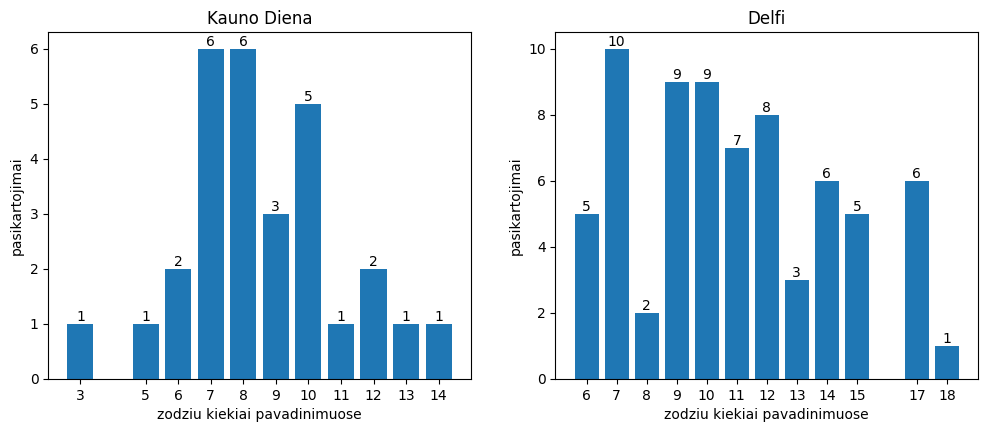

In [4]:
kiekiai_dict_kauno = {}
for k in (list(set(zodziu_kiekiai_kauno))):
    kiekiai_dict_kauno[k] = 0


for k in kiekiai_dict_kauno.keys():
    c = zodziu_kiekiai_kauno.count(k)
    kiekiai_dict_kauno[k] = c
    
print(kiekiai_dict_kauno)
print(sum(kiekiai_dict_kauno.values()))

x_asis_kauno = list(kiekiai_dict_kauno.keys())

kiekiai_dict = {}
for k in (list(set(zodziu_kiekiai))):
    kiekiai_dict[k] = 0


for k in kiekiai_dict.keys():
    c = zodziu_kiekiai.count(k)
    kiekiai_dict[k] = c
    
print(kiekiai_dict)
print(sum(kiekiai_dict.values()))

x_asis = list(kiekiai_dict.keys())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

B1 = ax1.bar(kiekiai_dict_kauno.keys(), kiekiai_dict_kauno.values())
ax1.bar_label(B1)
ax1.set_xticks(x_asis_kauno)
ax1.set_xlabel('zodziu kiekiai pavadinimuose')
ax1.set_ylabel('pasikartojimai')
ax1.set_title('Kauno Diena')

B2 = ax2.bar(kiekiai_dict.keys(), kiekiai_dict.values())
ax2.bar_label(B2)
ax2.set_xticks(x_asis)
ax2.set_xlabel('zodziu kiekiai pavadinimuose')
ax2.set_ylabel('pasikartojimai')
ax2.set_title('Delfi')


plt.show()

In [5]:
idx_kauno = (zodziu_kiekiai_kauno.index(max(zodziu_kiekiai_kauno)))
print(idx_kauno)
print(pavadinimai_kauno[idx_kauno])
print(nuorodos_kauno[idx_kauno])
max_zodziu_straipsnis_kauno = nuorodos_kauno[idx_kauno]

idx = (zodziu_kiekiai.index(max(zodziu_kiekiai)))
print(idx)
print(pavadinimai[idx])
print(nuorodos[idx])
max_zodziu_straipsnis = nuorodos[idx]

25
J. Statkevičius atvirai: kodėl nesiruošia į pensiją ir kiek po Paryžiaus kainuos jo drabužiai
naujienos/laisvalaikis-ir-kultura/zvaigzdes-ir-pramogos/j-statkevicius-atvirai-kodel-nesiruosia-i-pensija-ir-kiek-po-paryziaus-kainuos-jo-drabuziai-1195814
58
Pinskuvienė įsitikinusi, kad „Nemuno aušros“ ir konservatorių sėkmę lėmė Žemaitaičio retorika: spardydami vieni kitus – kėlė ir vienijo
/news/daily/politics/pinskuviene-isitikinusi-kad-nemuno-ausros-ir-konservatoriu-sekme-leme-zemaitaicio-retorika-spardydami-vieni-kitus-kele-ir-vienijo-120057092


In [6]:
if max_zodziu_straipsnis_kauno.startswith('https:'):
    url2_kauno = max_zodziu_straipsnis_kauno
else:
    url2_kauno = f'https://kauno.diena.lt/{max_zodziu_straipsnis_kauno}'
    
print(url2_kauno)

page_kauno = requests.get(url2_kauno)

source_kauno = page_kauno.content

bs2_kauno = BeautifulSoup(source_kauno, 'html.parser')
# print(bs)
# tekstas = ''

pastraipos_kauno = bs2_kauno.find_all('span', {'itemprop':'articleBody'})
# print(len(pastraipos))
tekstas_kauno = pastraipos_kauno[0].text

    
print(len(tekstas_kauno.split()))

from collections import Counter

zodziai_tektste_kauno = dict(Counter(tekstas_kauno.split()))
print(zodziai_tektste_kauno.values())


# delfi
if max_zodziu_straipsnis.startswith('https:'):
    url2 = max_zodziu_straipsnis
else:
    url2 = f'https://www.delfi.lt/{max_zodziu_straipsnis}'
# url2 = 'https://www.delfi.lt/news/daily/crime/didelis-gaisras-vilniaus-rajone-gausios-gelbetoju-pajegos-gesino-daugiabuti-gyventojai-liko-be-pastoges-120056809'
print(url2)
page = requests.get(url2)
source = page.content
bs2 = BeautifulSoup(source, 'html.parser')


pastraipos = bs2.find_all('div', {'class':'fragment fragment-html fragment-html--paragraph'})
# print(len(pastraipos))

fragmentai = []

for p in pastraipos:
    fragmentai.append(p.text)
    # print()
    # print(p.text)
    
tekstas = ' '.join(fragmentai)
# print(tekstas)
print(len(tekstas.split()))

from collections import Counter

zodziai_tektste = dict(Counter(tekstas.split()))
print(zodziai_tektste.values())

https://kauno.diena.lt/naujienos/laisvalaikis-ir-kultura/zvaigzdes-ir-pramogos/j-statkevicius-atvirai-kodel-nesiruosia-i-pensija-ir-kiek-po-paryziaus-kainuos-jo-drabuziai-1195814
351
dict_values([1, 2, 1, 1, 1, 5, 1, 1, 2, 2, 5, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 10, 2, 1, 1, 1, 2, 1, 2, 1, 9, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
df_kauno = pd.DataFrame(zodziai_tektste_kauno.items(), columns=['zodis', 'kiekis'])

df = pd.DataFrame(zodziai_tektste.items(), columns=['zodis', 'kiekis'])

In [8]:
df_st_kauno = df_kauno.sort_values(by=['kiekis'],ascending=False).reset_index()[:5]

df_st = df.sort_values(by=['kiekis'],ascending=False).reset_index()[:5]

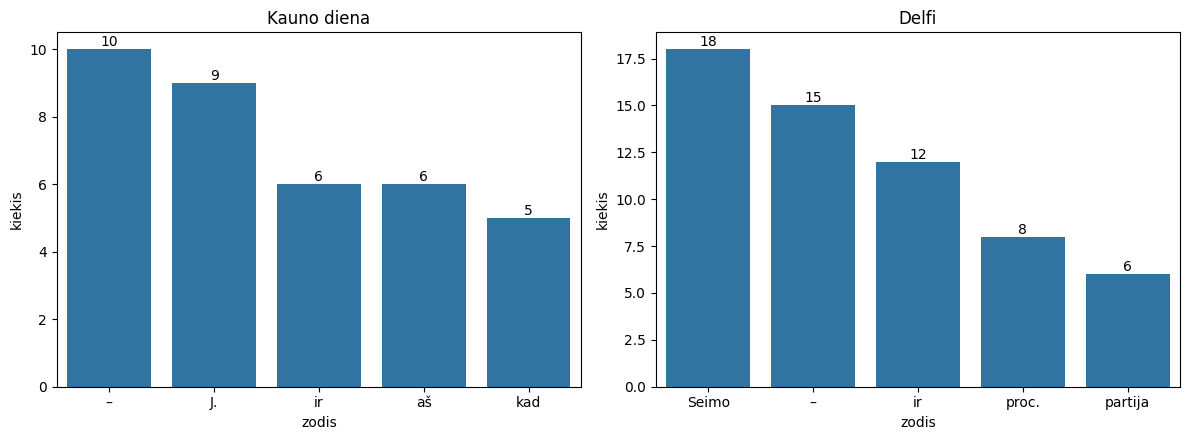

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
sns.barplot(data=df_st_kauno, x=df_st_kauno['zodis'], y=df_st_kauno['kiekis'], ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set_title('Kauno diena')

sns.barplot(data=df_st, x=df_st['zodis'], y=df_st['kiekis'], ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container)    
ax2.set_title('Delfi')
fig.tight_layout()
plt.show()

In [10]:
zodziai_straipsniuose_kauno = []

for nuoroda in nuorodos_kauno:
    # print(nuoroda)
    if  nuoroda.startswith('https'):
        url3_kauno = nuoroda
    else:
        url3_kauno = f'https://kauno.diena.lt/{nuoroda}'

        page_kauno = requests.get(url3_kauno)
        source_kauno = page_kauno.content

        bs3_kauno = BeautifulSoup(source_kauno, 'html.parser')
        pastraipos_kauno = bs3_kauno.find_all('span', {'itemprop':'articleBody'})

        tekstas_kauno = pastraipos_kauno[0].text

        zodziai_straipsniuose_kauno.append(len(tekstas_kauno.split()))
        # time.sleep(0.5)
        # print(len(tekstas.split()))

print(len(zodziai_straipsniuose_kauno))
print(zodziai_straipsniuose_kauno)

print(f'vidutinis zodziu kiekis "Kauno Diena" straipsniuose: {sum(zodziai_straipsniuose_kauno) / len(zodziai_straipsniuose_kauno)}')

zodziai_straipsniuose = []

for nuoroda in nuorodos:
    # print(nuoroda)
    if nuoroda.startswith('https:'):
        url3 = nuoroda
    else:
        url3 = f'https://www.delfi.lt{nuoroda}'

    page = requests.get(url3)
    source = page.content

    bs3 = BeautifulSoup(source, 'html.parser')
        
    fragmentai = []
    pastraipos = bs3.find_all('div', {'class':'fragment fragment-html fragment-html--paragraph'})

    for p in pastraipos:
            fragmentai.append(p.text)
        
    tekstas = ' '.join(fragmentai)
    zodziai_straipsniuose.append(len(tekstas.split()))

print(len(zodziai_straipsniuose))
print(zodziai_straipsniuose)

print(f'vidutinis zodziu kiekis "Delfi" straipsniuose: {sum(zodziai_straipsniuose) / len(zodziai_straipsniuose)}')

28
[578, 995, 69, 381, 703, 76, 1065, 1345, 214, 424, 272, 186, 692, 1934, 101, 3373, 651, 169, 95, 163, 312, 318, 37, 206, 351, 1195, 460, 405]
vidutinis zodziu kiekis "Kauno Diena" straipsniuose: 598.9285714285714
71
[145, 1216, 346, 126, 898, 409, 274, 122, 1912, 280, 361, 365, 482, 315, 370, 941, 348, 109, 64, 316, 66, 903, 49, 118, 113, 41, 57, 214, 52, 109, 24, 22, 111, 50, 146, 47, 65, 18, 126, 1912, 1453, 868, 654, 88, 122, 838, 348, 903, 30, 145, 600, 409, 321, 114, 346, 274, 377, 64, 476, 482, 1003, 451, 233, 49, 722, 742, 553, 504, 865, 214, 136]
vidutinis zodziu kiekis "Delfi" straipsniuose: 394.7323943661972
